In [2]:
# import necessary libraries

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pylab import rcParams
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')


<b>  
Problem 1: Linear Regression
<br/>
    
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.
    
</b>

In [3]:
# Drop the not-useful 'Unnamed: 0' column.

df = pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0', axis=1)

<b>
    1.1. 
    <br/>
    Read the data and do exploratory data analysis.
    <br/>
    Describe the data briefly. (Check the null values, Data types, shape, EDA). 
    <br/>
    Perform Univariate and Bivariate Analysis.
</b>

## EDA

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.shape

(26967, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
# Describe

df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.80,0.48,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.75,1.41,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.46,2.23,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.73,1.13,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.73,1.17,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.54,0.72,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.52,4024.86,326.0,945.00,2375.00,5360.00,18818.00


In [8]:
# Check the zeros for x

df[(df.x == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [9]:
# Check the zeros for y

df[(df.y == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [10]:
# Check the zeros for z

df[(df.z == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


## Impute 0 values of X, Y and Z with Mean

In [11]:
df.loc[df.loc[:,'x'] == 0, 'x'] = df.loc[:, 'x'].mean()
df.loc[df.loc[:,'y'] == 0, 'y'] = df.loc[:, 'y'].mean()
df.loc[df.loc[:,'z'] == 0, 'z'] = df.loc[:, 'z'].mean()

## Uni-Variate Analysis

<AxesSubplot:xlabel='depth'>

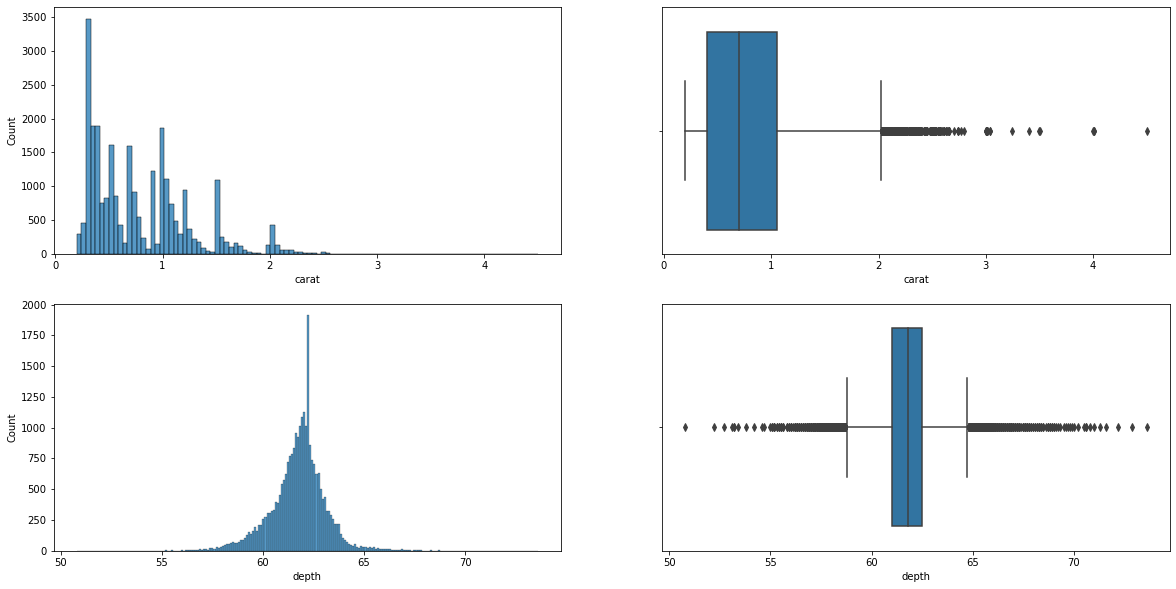

In [12]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=fig_dims) 

sns.histplot(df.carat, kde=False, ax=axs[0][0]) 
sns.boxplot(x= 'carat', data=df, ax=axs[0][1])

sns.histplot(df.depth, kde=False, ax=axs[1][0]) 
sns.boxplot(x= 'depth', data=df, ax=axs[1][1])

<AxesSubplot:xlabel='x'>

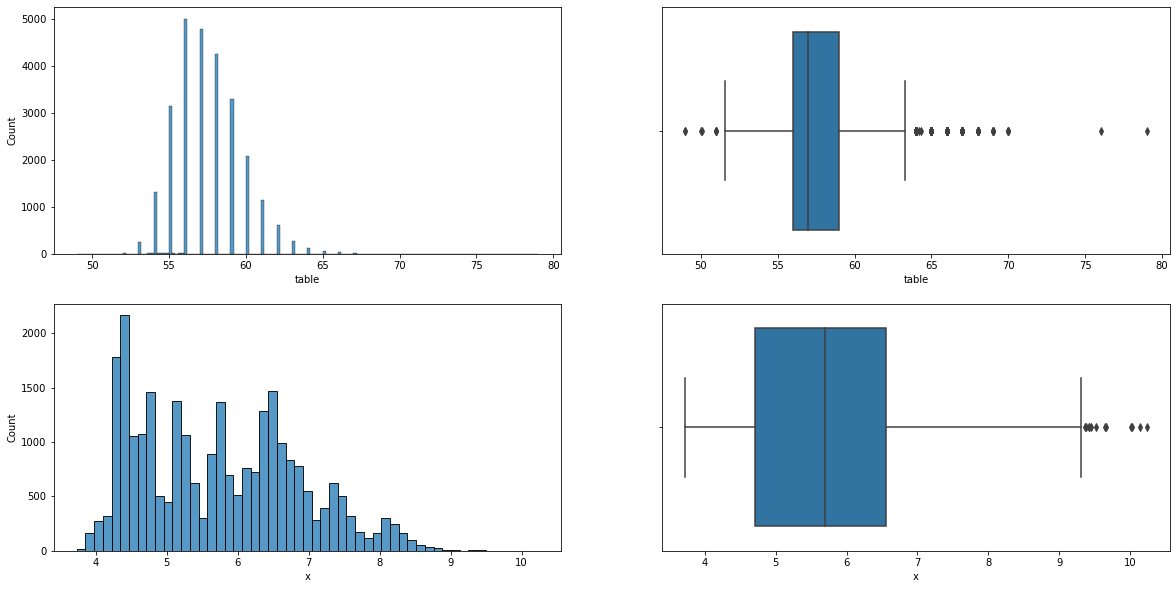

In [13]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=fig_dims) 

sns.histplot(df.table, kde=False, ax=axs[0][0]) 
sns.boxplot(x= 'table', data=df, ax=axs[0][1])

sns.histplot(df.x, kde=False, ax=axs[1][0]) 
sns.boxplot(x= 'x', data=df, ax=axs[1][1])

<AxesSubplot:xlabel='price'>

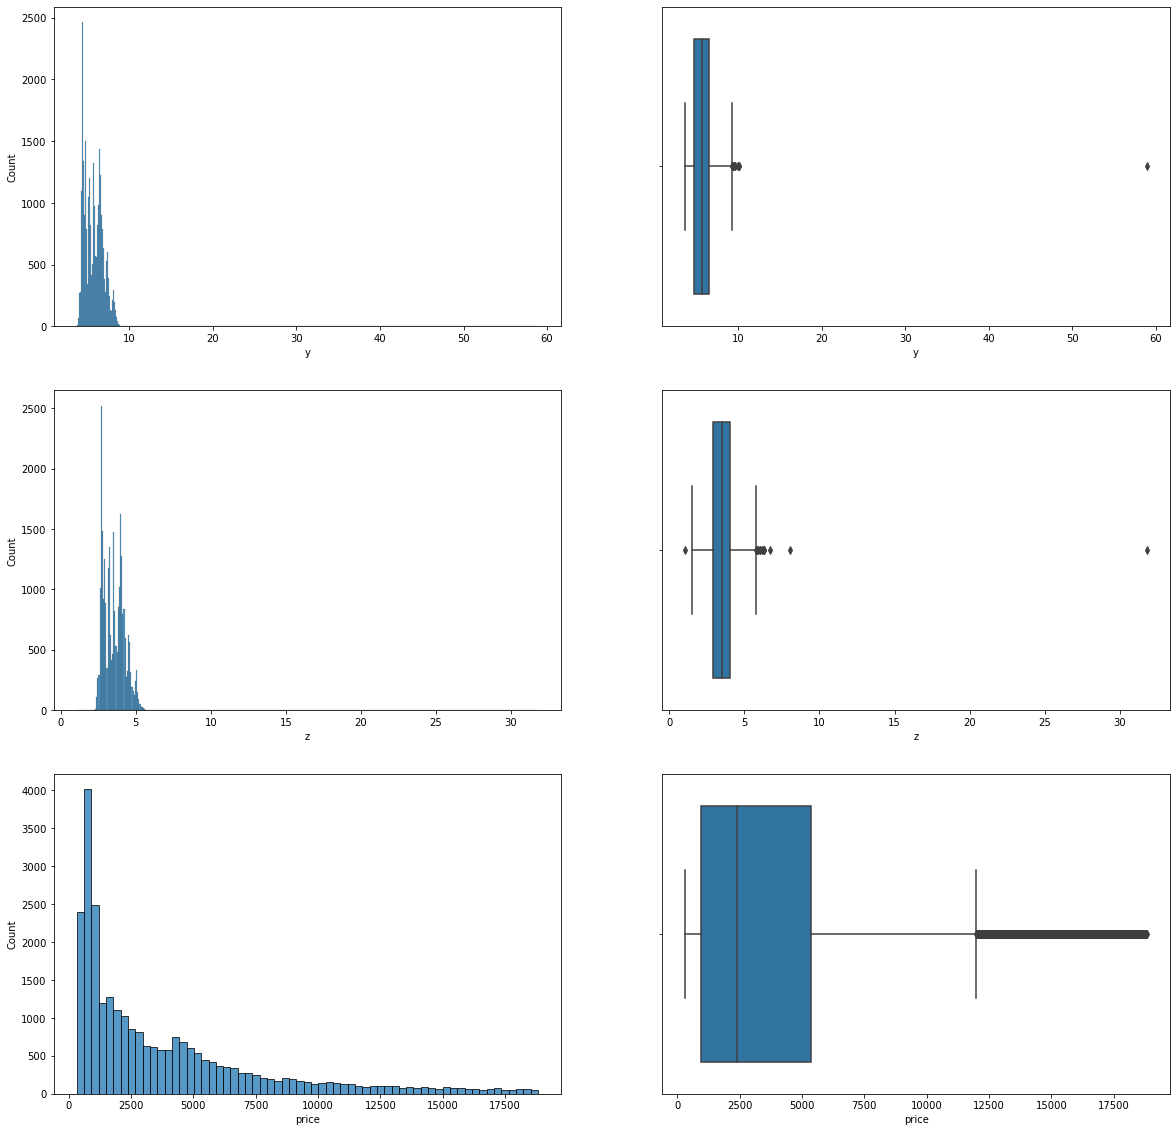

In [14]:
fig_dims = (20, 20) 
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=fig_dims) 

sns.histplot(df.y, kde=False, ax=axs[0][0]) 
sns.boxplot(x= 'y', data=df, ax=axs[0][1])

sns.histplot(df.z, kde=False,  ax=axs[1][0]) 
sns.boxplot(x= 'z', data=df,  ax=axs[1][1])

sns.histplot(df.price, kde=False,  ax=axs[2][0]) 
sns.boxplot(x= 'price', data=df,  ax=axs[2][1])

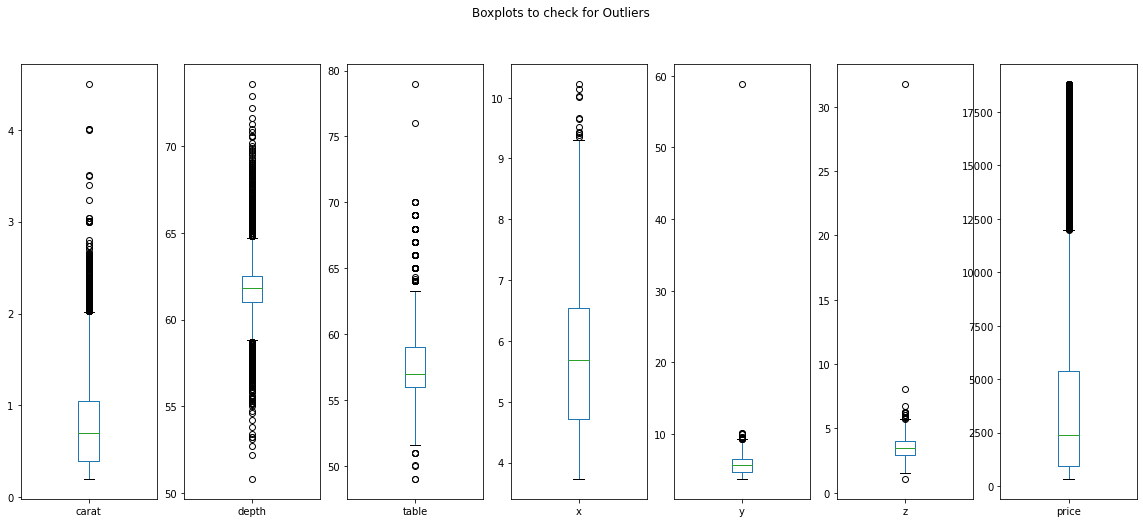

In [15]:
num_cols=df.dtypes[(df.dtypes!='object')].index

df[num_cols].plot(kind = 'box', figsize = (20,8),subplots = True, title = 'Boxplots to check for Outliers');

## Bi-Variate Analysis

<Figure size 1440x1440 with 0 Axes>

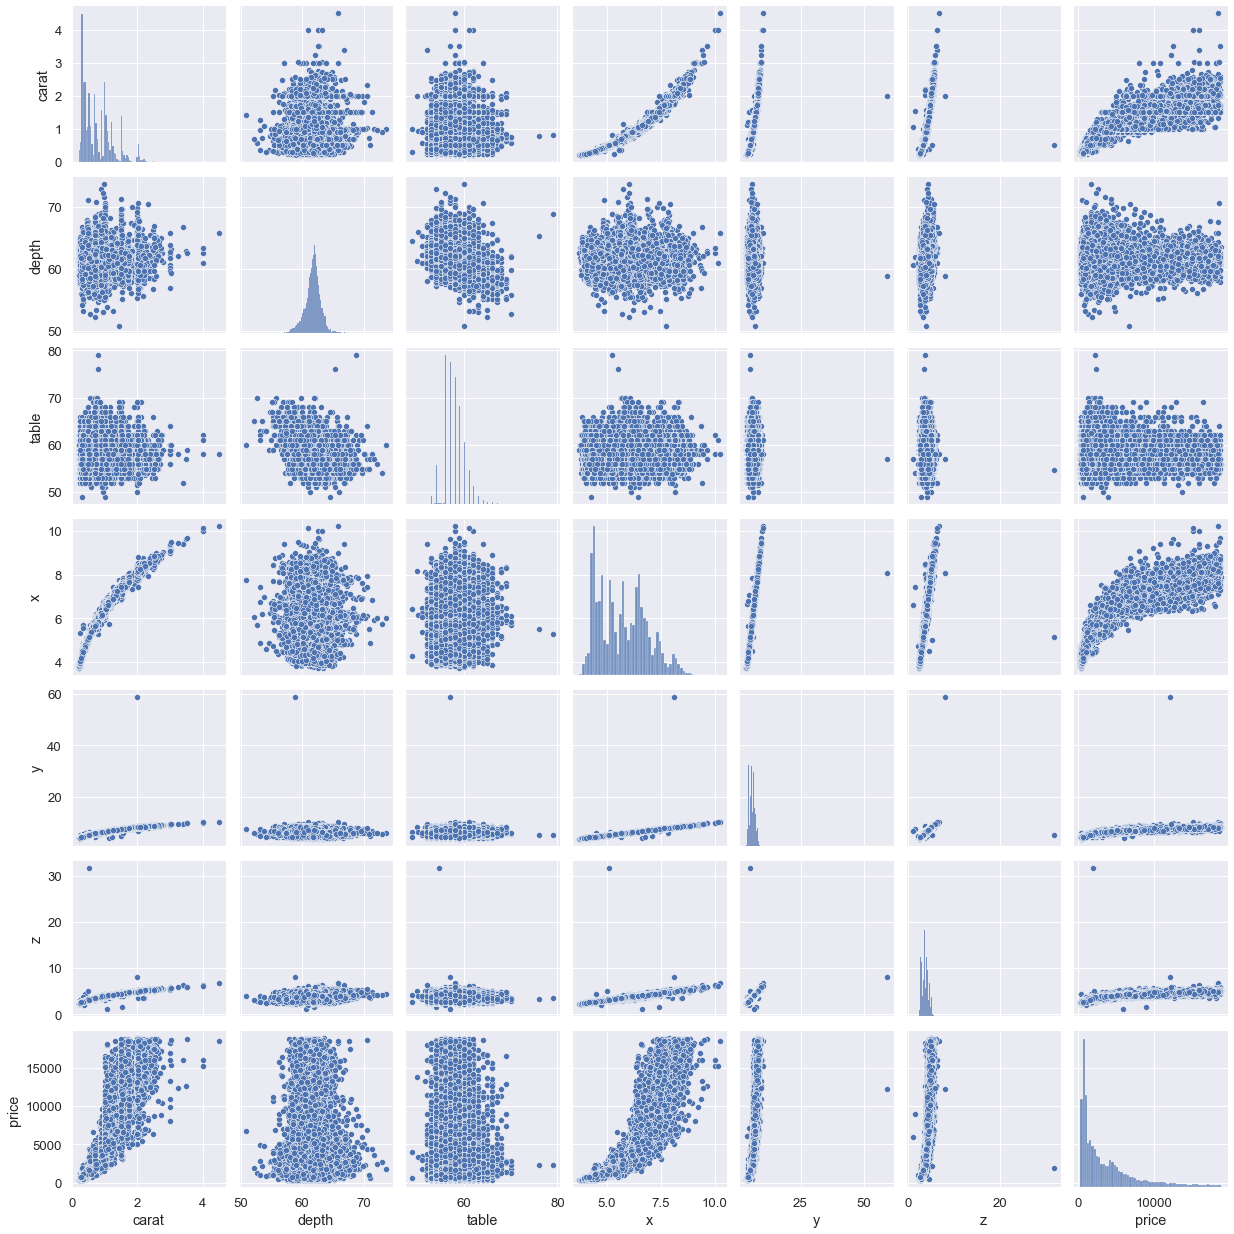

In [16]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.pairplot(df)

## Correlation Plot

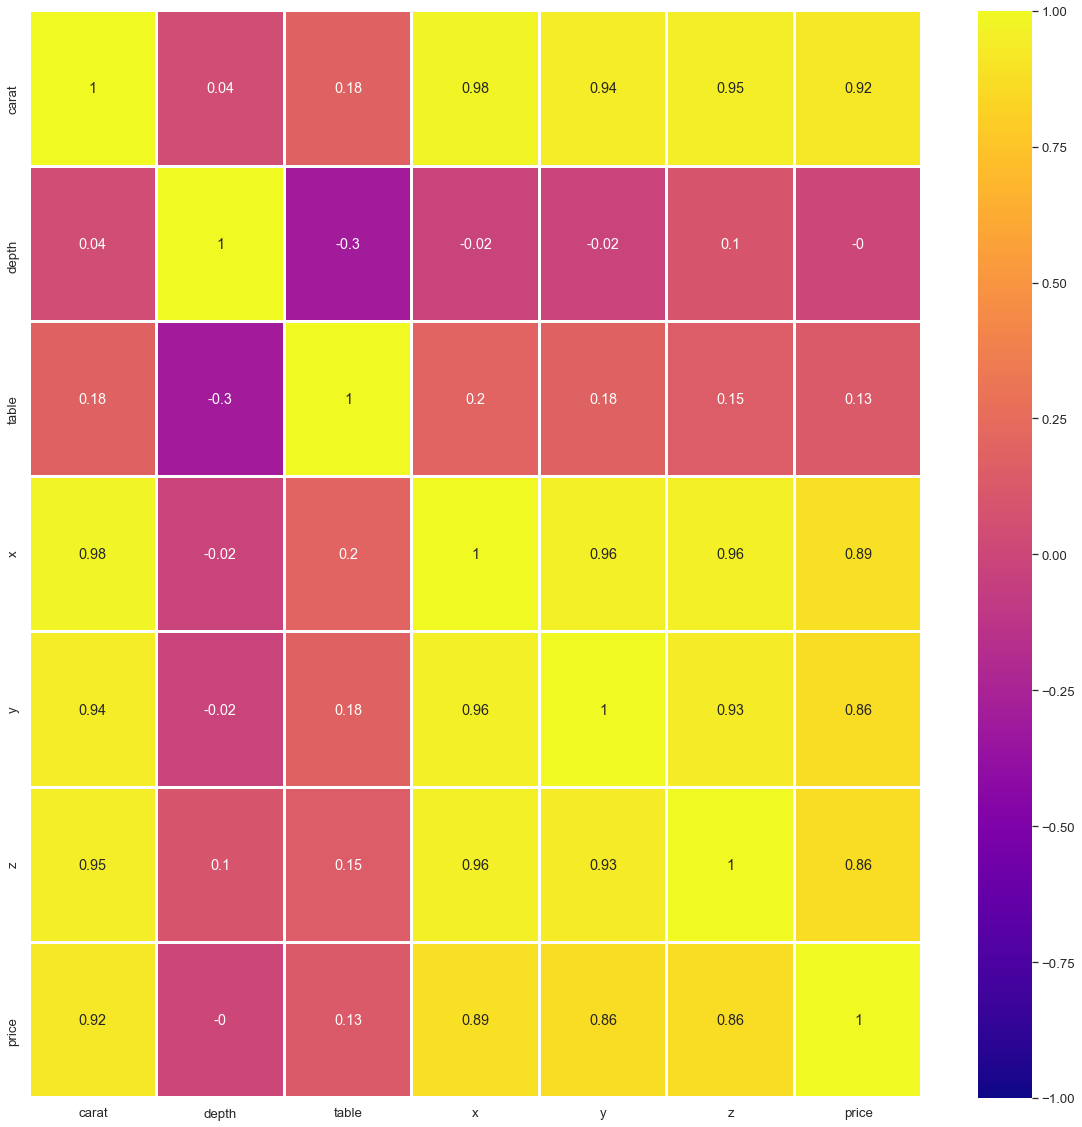

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().round(2),annot=True, linewidths=2,cmap='plasma', vmin=-1,vmax=1);

<b>
    1.2 
    <br/>
    Impute null values if present, 
    <br/>
    also check for the values which are equal to zero. 
    <br/>
    Do they have any meaning or do we need to change them or drop them? 
    <br/>
    Do you think scaling is necessary in this case?
</b>

## Check for Null Values

In [18]:
# Check for na values

df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

## Impute Null Values

In [19]:
# Impute the null values with mean

df.loc[df.loc[:,'depth'].isnull(), 'depth'] = df.loc[:, 'depth'].mean()

In [20]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Check for Duplicates

In [21]:
# Check for duplicate values

df.duplicated().sum()

34

In [22]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

## Treat Outliers

In [24]:
# Treat outliers

# def outlier_limits(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range

# for column in df[num_cols].columns:
#     lr,ur=outlier_limits(df[column])
#     df[column]=np.where(df[column]>ur,ur,df[column])
#     df[column]=np.where(df[column]<lr,lr,df[column])

# Check if outliers have been capped

# df[num_cols].plot(kind = 'box', 
#               title = 'Boxplots after Outlier Capping',
#              figsize = (20,8),
#              subplots = True);


## One Hot Encoding

<b>1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.</b>

In [25]:
# Convert the cut, color and clarity to a number type

object_columns = ['cut', 'color', 'clarity']

# Ordinal Encoding
# for col in object_columns:
#     ordinal_encoder = OrdinalEncoder()
#     colname = col + '_encoded'
#     df[col] = ordinal_encoder.fit_transform(df[[col]])
# ordinal_encoder.categories_
    
for column in object_columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')
    
# One hot encoding
df = pd.get_dummies(df, columns=object_columns,drop_first=True)

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




## Linear Regression

In [26]:
from sklearn.preprocessing import StandardScaler

X = df.drop('price', axis=1)

y = df[['price']]

# Scale Y as it might cause the coefficients also scale to match the Price. Used the Z-Score formula.
y = (y-y.mean())/y.std()
# y = np.log(y)

## Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=1)

## Model Creation

In [28]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [29]:
regression_model.coef_

array([[ 2.89159226e+00, -1.72272240e-02, -6.33467357e-03,
        -2.84182578e-01, -6.40721292e-04, -1.21569395e-02,
         1.33797029e-01,  1.93421279e-01,  1.70243010e-01,
         1.67351251e-01, -4.63744828e-02, -7.03825166e-02,
        -1.21807271e-01, -2.50455691e-01, -3.78409861e-01,
        -5.98271903e-01,  1.28915934e+00,  8.71023759e-01,
         6.25678322e-01,  1.09834999e+00,  1.02068312e+00,
         1.20712440e+00,  1.19767055e+00]])

In [30]:
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx].round(2)}")

The coefficient for carat is 2.89
The coefficient for depth is -0.02
The coefficient for table is -0.01
The coefficient for x is -0.28
The coefficient for y is -0.0
The coefficient for z is -0.01
The coefficient for cut_Good is 0.13
The coefficient for cut_Ideal is 0.19
The coefficient for cut_Premium is 0.17
The coefficient for cut_Very Good is 0.17
The coefficient for color_E is -0.05
The coefficient for color_F is -0.07
The coefficient for color_G is -0.12
The coefficient for color_H is -0.25
The coefficient for color_I is -0.38
The coefficient for color_J is -0.6
The coefficient for clarity_IF is 1.29
The coefficient for clarity_SI1 is 0.87
The coefficient for clarity_SI2 is 0.63
The coefficient for clarity_VS1 is 1.1
The coefficient for clarity_VS2 is 1.02
The coefficient for clarity_VVS1 is 1.21
The coefficient for clarity_VVS2 is 1.2



## Important Attributes Plot

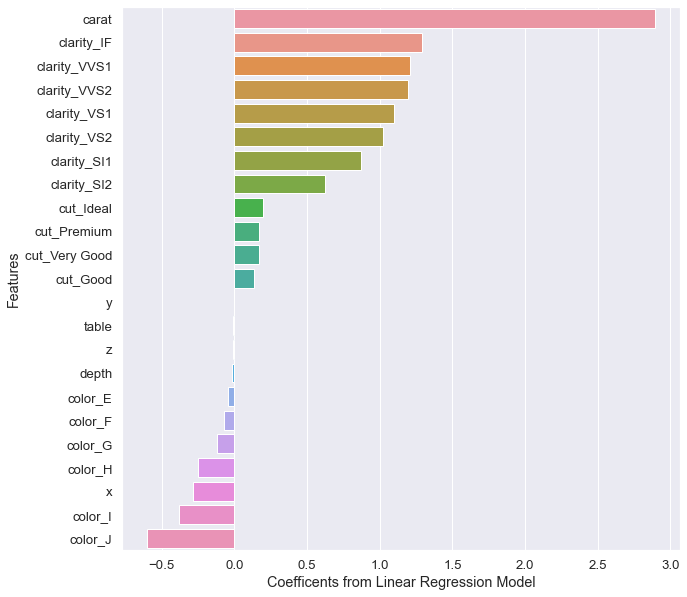

In [31]:
coef_df = pd.DataFrame({'columns': X_train.columns, 'coef': regression_model.coef_[0]})

sorted_coef_values = coef_df.sort_values('coef', ascending=False)


plt.figure(figsize=(10,10))
sns.barplot(x='coef', y='columns', data=sorted_coef_values)
plt.xlabel('Coefficents from Linear Regression Model')
plt.ylabel('Features')
plt.show()

In [32]:

intercept = regression_model.intercept_[0]

print(f"The intercept for our model is {intercept}")

The intercept for our model is -0.1732550659903409


## R-Square

In [33]:
# R square on training data

regression_model.score(X_train, y_train)

0.9205314587881467

In [75]:
# R square on testing data

regression_model.score(X_test, y_test)

0.9234410679981482

## RMSE on Training Data

In [82]:
#RMSE on Training data

predicted_train=regression_model.predict(X_train)
mean_squared_error(y_train,predicted_train, squared=False)

0.2809839987306327

## RMSE on Test Data

In [79]:
#RMSE on Test data

predicted_tests=regression_model.predict(X_test)
mean_squared_error(y_test,predicted_tests, squared=False)

0.27876530978087727